## **Supreme Court Judgement Project**
**Mayank Pujara | Batch: MIP-NLP-02**

---
This project aims to utilize Natural Language Processing (NLP) methods to forecast the results of Supreme Court rulings. Forecasting decisions from the highest judicial body involves comprehending legal texts and past patterns intricately. Through NLP tools and machine learning, the goal is to create a predictive model capable of anticipating Supreme Court judgments by analyzing case texts. The project intends to aid legal experts, scholars, and policymakers in comprehending and predicting legal verdicts.


### **Importing necessary Libraries**

In [1]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Reading the CSV file containing the judgements into a Pandas DataFrame**

In [2]:
data = pd.read_csv('/content/justice.csv')

### **Data Preprocessing & Cleaning**

In [3]:
data.dropna(inplace=True) # Handling missing values

In [4]:
data.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
5,5,50644,Kleindienst v. Mandel,https://api.oyez.org/cases/1971/71-16,71-16,1971,"Richard G. Kleindienst, Attorney General of th...","Ernest E. Mandel, et al.",<p>Ernest E. Mandel was a Belgian professional...,2282,6,3,True,majority opinion,reversed,First Amendment


In [5]:
data.shape

(3098, 16)

In [6]:
data['combinedText'] = data['facts'] + ' ' + data['term'] + ' ' + data['issue_area']

def cleanText(text):
    textWithoutHtml = BeautifulSoup(text, "html.parser").get_text()
    cleanedText = re.sub(r"[^a-zA-Z\s]", "", textWithoutHtml)
    cleanedText = cleanedText.lower()
    return cleanedText

def tokenizeAndLemmatize(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data['cleanedText'] = data['combinedText'].apply(cleanText)
data['cleanedText'] = data['cleanedText'].apply(tokenizeAndLemmatize)

data['first_party_winner'] = data['first_party_winner'].astype(str)

### **Data Visualization**

**Bar plot for visualizing the** *term* **distribution**<br>
This plot indicates the frequency or distribution of cases across different terms. We can gather insights regarding the volume of cases heard in specific terms.

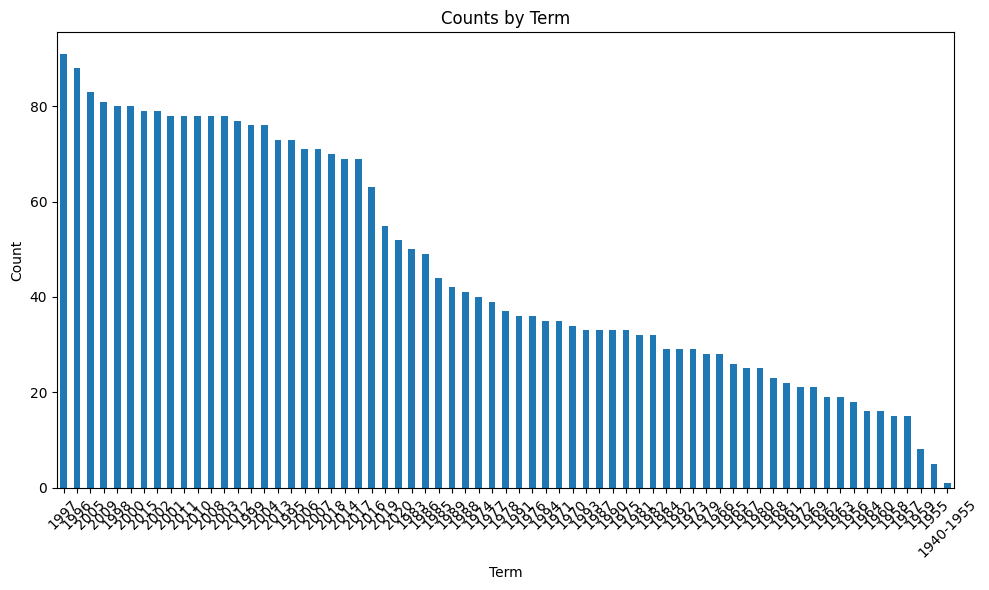

In [7]:
plt.figure(figsize=(10, 6))
data['term'].value_counts().plot(kind='bar')
plt.title('Counts by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Bar plot for the** *issue_area* **column**<br>
This plot shows the distribution of cases across various legal issue areas. It helps in understanding which legal domains have more prevalent cases.

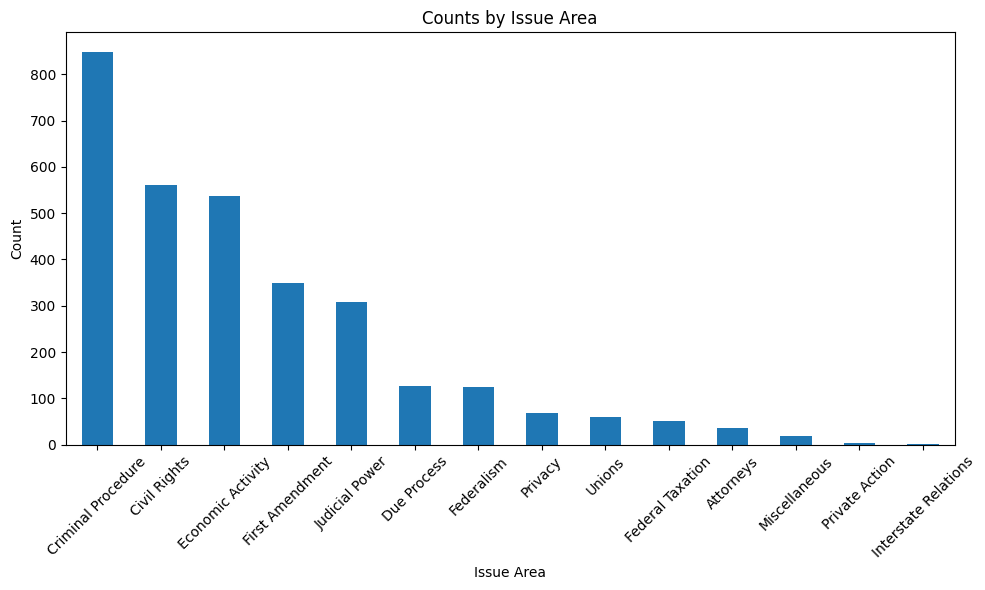

In [8]:
plt.figure(figsize=(10, 6))
data['issue_area'].value_counts().plot(kind='bar')
plt.title('Counts by Issue Area')
plt.xlabel('Issue Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Word cloud for the** *facts* **field**<br>
Identifies the most common words/phrases appearing in the case summaries and gives a visual representation of frequently occurring terms, potentially highlighting dominant themes or key topics across the cases.

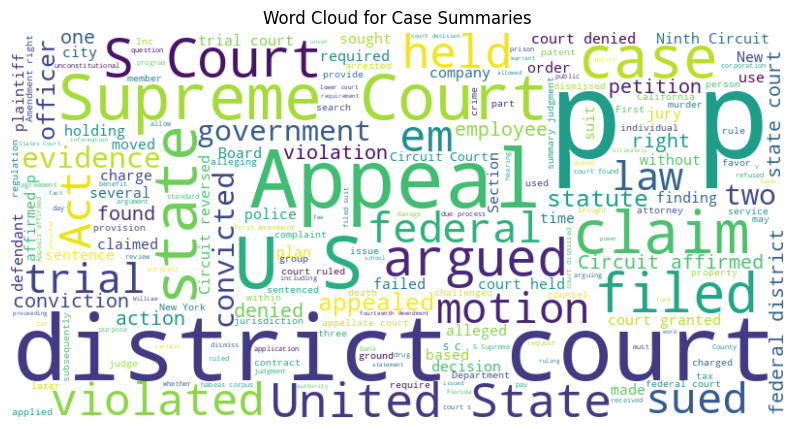

In [9]:
text = ' '.join(data['facts'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Case Summaries')
plt.show()

### **Feature Extraction using TfidfVectorizer**

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=1500, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(data['cleanedText']).toarray()
y = data['first_party_winner']

### **Splitting the data into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Implementation using Logistic Regression model from the scikit-learn library**

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model is: {accuracy*100:.2f} %")

Accuracy of the model is: 67.58 %


### **Classification report**

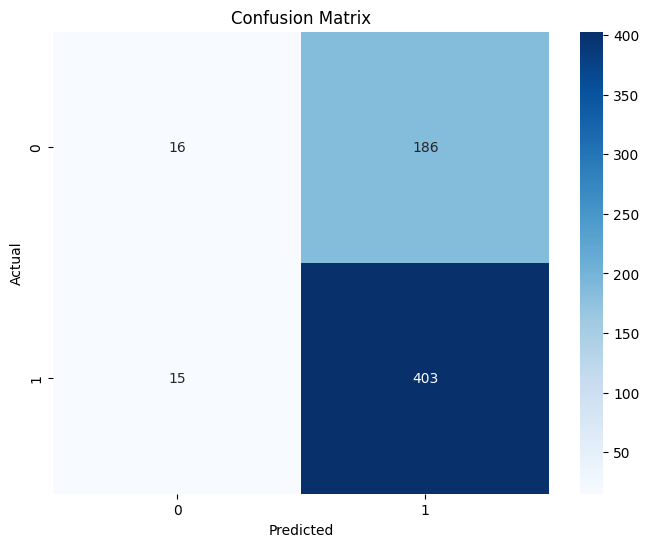

In [13]:
confusionMatrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

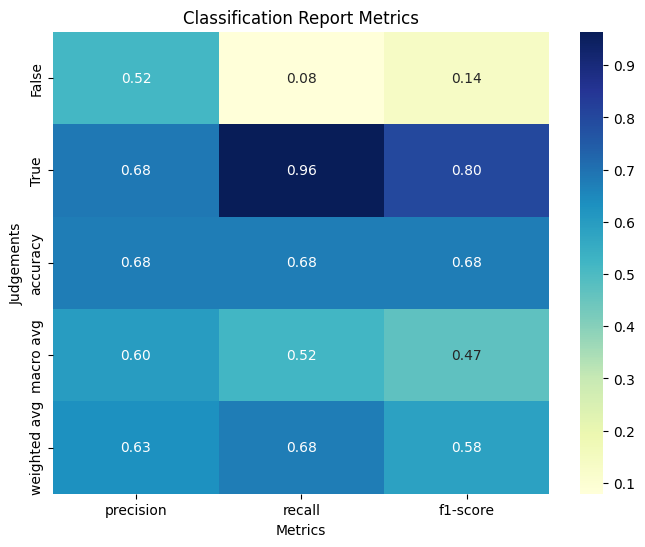

In [14]:
reportDictionary = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(reportDictionary).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:, :3], annot=True, cmap='YlGnBu', fmt='.2f')
plt.xlabel('Metrics')
plt.ylabel('Judgements')
plt.title('Classification Report Metrics')
plt.show()

### **Judgement prediction on a custom input**

In [15]:
customInput = """
The case involves a dispute between two companies over patent infringement related to genetic engineering.
Company A claims that Company B violated its patents by using a specific gene-editing technique in the production of genetically modified crops.
Company B argues that the patents are invalid and that they have not infringed upon Company A's intellectual property rights.
The lower court ruled in favor of Company A, citing substantial evidence of patent infringement.
Company B has filed an appeal, challenging the lower court's decision, asserting that the patents in question lack novelty and are overly broad.
The case has attracted attention within the biotech industry and raises important legal questions regarding intellectual property rights in genetic modification technologies.
"""

cleanedCustomInput = cleanText(customInput)
cleanedCustomInput = tokenizeAndLemmatize(cleanedCustomInput)
customInputVector = tfidf_vectorizer.transform([cleanedCustomInput]).toarray()

prediction = model.predict(customInputVector)
print(f"Predicted Outcome: {prediction.astype(str)}")

Predicted Outcome: ['True']
